In [1]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)

#### Using spreadsheets of Eigenfrequency results

In [2]:
Efreq_cf2p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center2p5_n109.csv', skiprows=4)
Efreq_cf3p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center3p5_n109.csv', skiprows=4)
Efreq_cf4p0 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_center4_n109.csv', skiprows=4)
Efreq_cf4p5 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/wgm_code/eigenCSV/alumina_eigenfreqs_centerfreq4p5GHz_n109.csv', skiprows=4)

In [3]:
def fix_csv(file): 
    
    # Define a function to convert string representation to complex number
    def convert_to_j(x):
        if isinstance(x, str):  # Only try to convert if it's a string
            try:
                return x.replace('i', 'j')  # Replace 'i' with 'j' for Python compatibility
            except ValueError:
                return None  # Return None for invalid values (if any)
        else:
            return x  # If it's already a number (e.g., float), return it unchanged
        
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(convert_to_j) # convert i to j for column 
    file['% Eigenfrequency (GHz)'] = file['% Eigenfrequency (GHz)'].apply(complex)
    file[['Frequency (GHz)', 'Quality factor (1)']] = file[['Frequency (GHz)', 'Quality factor (1)']].apply(pd.to_numeric, errors='coerce')

    file['Eigenfreq_Real'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.real)
    file['Eigenfreq_Imag'] = file['% Eigenfrequency (GHz)'].apply(lambda x: x.imag)

    return file

    

In [4]:
E_cf2p5 = fix_csv(Efreq_cf2p5)
E_cf3p5 = fix_csv(Efreq_cf3p5)
E_cf4p0 = fix_csv(Efreq_cf4p0)
E_cf4p5 = fix_csv(Efreq_cf4p5)

In [5]:
eigens_combined = pd.concat([E_cf2p5, E_cf3p5, E_cf4p0, E_cf4p5], ignore_index=True)

In [6]:
eigens_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype     
---  ------                  --------------  -----     
 0   % Eigenfrequency (GHz)  872 non-null    complex128
 1   Frequency (GHz)         872 non-null    float64   
 2   Quality factor (1)      872 non-null    float64   
 3   Eigenfreq_Real          872 non-null    float64   
 4   Eigenfreq_Imag          872 non-null    float64   
dtypes: complex128(1), float64(4)
memory usage: 41.0 KB


In [7]:
print(eigens_combined[eigens_combined['Frequency (GHz)']>4])

     % Eigenfrequency (GHz)  Frequency (GHz)  Quality factor (1)  \
538      4.002204+0.342710j         4.002204        5.839051e+00   
539      4.018853+0.041387j         4.018853        4.855191e+01   
540      4.019284+0.041383j         4.019284        4.856234e+01   
541      4.021172+0.439465j         4.021172        4.575074e+00   
542      4.027845+0.081465j         4.027845        2.472136e+01   
543      4.028264+0.081140j         4.028264        2.482291e+01   
544      4.029145+0.058831j         4.029145        3.424324e+01   
545      4.029357+0.058444j         4.029357        3.447205e+01   
546      4.043908+0.050840j         4.043908        3.977078e+01   
547      4.049892+0.000002j         4.049892        8.143140e+05   
548      4.050446+0.000002j         4.050446        1.041094e+06   
549      4.051637+0.058816j         4.051637        3.444314e+01   
550      4.052374+0.058881j         4.052374        3.441161e+01   
551      4.062724+0.281501j         4.062724    

Text(0.5, 1.0, 'Quality Factor vs. Frequency')

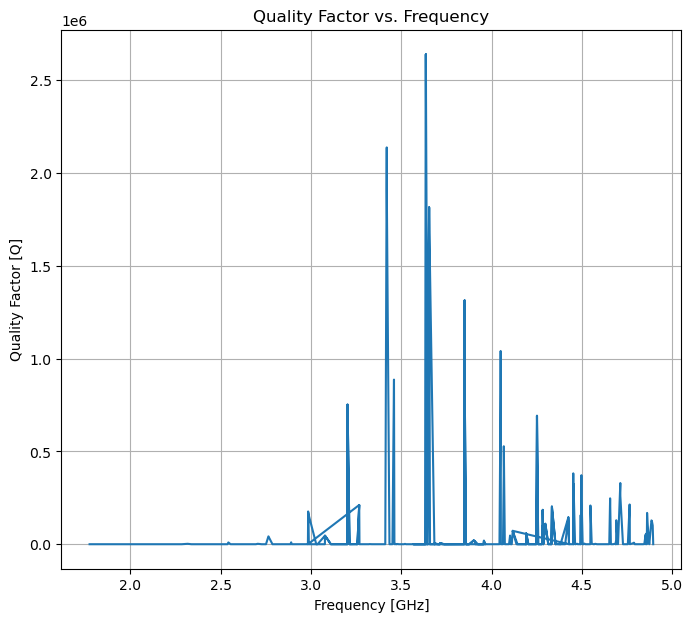

In [8]:
plt.figure(figsize = (8,7))
plt.plot(eigens_combined['Frequency (GHz)'], eigens_combined['Quality factor (1)'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Quality Factor [Q]')
plt.grid(True)
plt.title('Quality Factor vs. Frequency')

Text(0.5, 1.0, 'Quality Factor vs. Frequency')

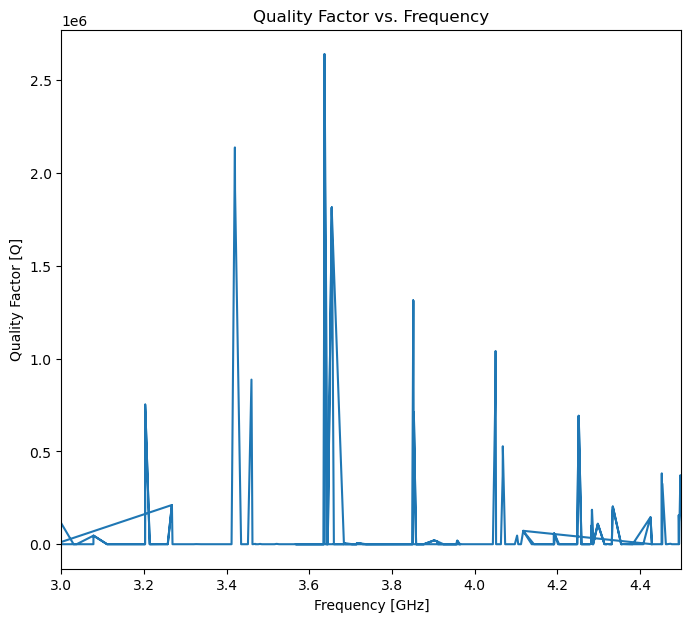

In [9]:
plt.figure(figsize = (8,7))
plt.plot(eigens_combined['Frequency (GHz)'], eigens_combined['Quality factor (1)'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Quality Factor [Q]')
plt.xlim(3.0, 4.5)
plt.title('Quality Factor vs. Frequency')

(3.4, 4.0)

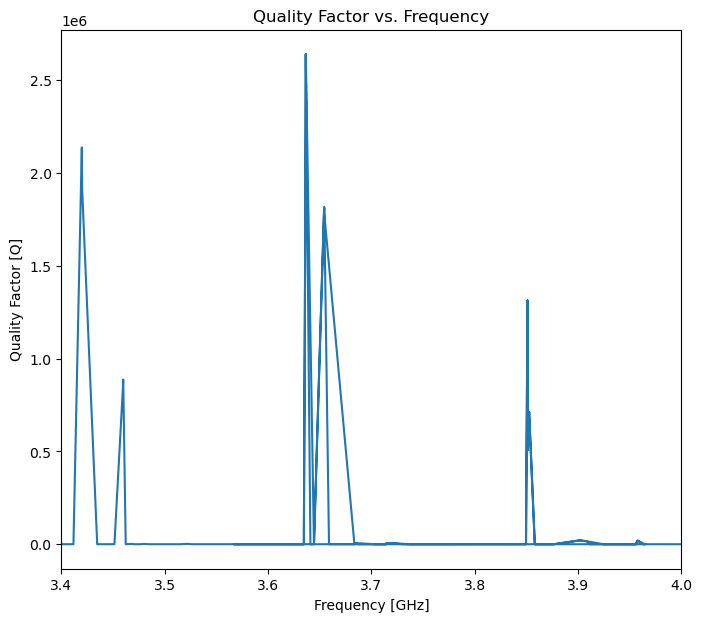

In [10]:
plt.figure(figsize = (8,7))
plt.plot(eigens_combined['Frequency (GHz)'], eigens_combined['Quality factor (1)'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Quality Factor [Q]')
plt.title('Quality Factor vs. Frequency')
plt.xlim(3.4, 4.0)

In [11]:
E_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


In [12]:
E_cf3p5 = fix_csv(Efreq_cf3p5)
E_cf3p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,2.983622+0.010531j,2.983622,1.416642e+02,2.983622,1.053062e-02
1,2.983662+0.010541j,2.983662,1.415217e+02,2.983662,1.054136e-02
2,2.984394+0.000009j,2.984394,1.753722e+05,2.984394,8.508744e-06
3,2.984503+0.000009j,2.984503,1.698777e+05,2.984503,8.784269e-06
4,3.029310+0.051021j,3.029310,2.968703e+01,3.029310,5.102078e-02
5,3.029499+0.051057j,3.029499,2.966808e+01,3.029499,5.105654e-02
6,3.036845+0.006531j,3.036845,2.324844e+02,3.036845,6.531288e-03
7,3.036945+0.006531j,3.036945,2.324850e+02,3.036945,6.531487e-03
8,3.077545+0.000033j,3.077545,4.630717e+04,3.077545,3.322968e-05
9,3.077768+0.000033j,3.077768,4.629740e+04,3.077768,3.323910e-05


In [13]:
E_cf3p5['E_Real'] = E_cf3p5['% Eigenfrequency (GHz)'].apply(lambda x: x.real)
E_cf3p5['E_Imag'] = E_cf3p5['% Eigenfrequency (GHz)'].apply(lambda x: x.imag)
E_cf3p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag,E_Real,E_Imag
0,2.983622+0.010531j,2.983622,1.416642e+02,2.983622,1.053062e-02,2.983622,1.053062e-02
1,2.983662+0.010541j,2.983662,1.415217e+02,2.983662,1.054136e-02,2.983662,1.054136e-02
2,2.984394+0.000009j,2.984394,1.753722e+05,2.984394,8.508744e-06,2.984394,8.508744e-06
3,2.984503+0.000009j,2.984503,1.698777e+05,2.984503,8.784269e-06,2.984503,8.784269e-06
4,3.029310+0.051021j,3.029310,2.968703e+01,3.029310,5.102078e-02,3.029310,5.102078e-02
5,3.029499+0.051057j,3.029499,2.966808e+01,3.029499,5.105654e-02,3.029499,5.105654e-02
6,3.036845+0.006531j,3.036845,2.324844e+02,3.036845,6.531288e-03,3.036845,6.531288e-03
7,3.036945+0.006531j,3.036945,2.324850e+02,3.036945,6.531487e-03,3.036945,6.531487e-03
8,3.077545+0.000033j,3.077545,4.630717e+04,3.077545,3.322968e-05,3.077545,3.322968e-05
9,3.077768+0.000033j,3.077768,4.629740e+04,3.077768,3.323910e-05,3.077768,3.323910e-05


In [14]:
min(E_cf3p5['E_Imag'])

6.887097781831543e-07

In [15]:
E_cf3p5_min = E_cf3p5[E_cf3p5['E_Imag']== min(E_cf3p5['E_Imag'])]
E_cf3p5_min

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag,E_Real,E_Imag
132,3.636493+0.000001j,3.636493,2.640076e+06,3.636493,6.887098e-07,3.636493,6.887098e-07


In [16]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


In [17]:
type(Efreq_cf2p5['% Eigenfrequency (GHz)'][0])

numpy.complex128

In [18]:
# Define a function to convert string representation to complex number
def convert_to_j(x):
    if isinstance(x, str):  # Only try to convert if it's a string
        try:
            return x.replace('i', 'j')  # Replace 'i' with 'j' for Python compatibility
        except ValueError:
            return None  # Return None for invalid values (if any)
    else:
        return x  # If it's already a number (e.g., float), return it unchanged

In [19]:
Efreq_cf2p5['% Eigenfrequency (GHz)'] = Efreq_cf2p5['% Eigenfrequency (GHz)'].apply(convert_to_j)

In [20]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


In [21]:
Efreq_cf2p5['% Eigenfrequency (GHz)'] = Efreq_cf2p5['% Eigenfrequency (GHz)'].apply(complex)

In [22]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


In [23]:
Efreq_cf2p5['% Eigenfrequency (GHz)'][0]

(1.7745196837838606+0.18564818739771877j)

In [24]:
tester_complex = complex(tester_value)
type(tester_complex)

NameError: name 'tester_value' is not defined

In [ ]:
tester_value = Efreq_cf2p5['% Eigenfrequency (GHz)'][0]
tester_value = tester_value.strip().strip('')

In [25]:
tester_value

NameError: name 'tester_value' is not defined

In [26]:
Efreq_cf2p5['% Eigenfrequency (GHz)'] = Efreq_cf2p5['% Eigenfrequency (GHz)'].apply(convert_to_j)


In [27]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


In [28]:
for x in pts:
    print(complex(x.strip().strip("()")))

NameError: name 'pts' is not defined

In [29]:
test = complex(Efreq_cf2p5['% Eigenfrequency (GHz)'][0])

In [30]:
Efreq_cf2p5 = Efreq_cf2p5.apply(pd.to_numeric, errors='coerce')

In [31]:
Efreq_cf2p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,1.774520+0.185648j,1.774520,4.779254,1.774520,0.185648
1,1.774545+0.185653j,1.774545,4.779191,1.774545,0.185653
2,1.787684+0.277842j,1.787684,3.217086,1.787684,0.277842
3,1.808136+0.051100j,1.808136,17.691991,1.808136,0.051100
4,1.808156+0.051104j,1.808156,17.690805,1.808156,0.051104
5,1.847968+0.007002j,1.847968,131.965064,1.847968,0.007002
6,1.847978+0.007002j,1.847978,131.967077,1.847978,0.007002
7,1.948936+0.465471j,1.948936,2.093511,1.948936,0.465471
8,1.949007+0.465443j,1.949007,2.093713,1.949007,0.465443
9,1.953323+0.527327j,1.953323,1.852099,1.953323,0.527327


Efreq_cf2p5 = pd.read

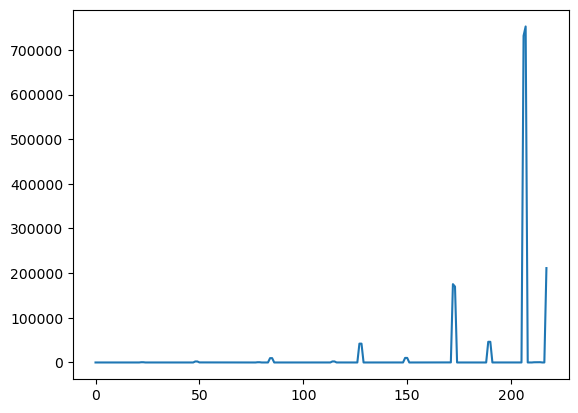

In [32]:
plt.plot(Efreq_cf2p5['Quality factor (1)'])

In [33]:
eigenfreq_array = np.array(Efreq_cf2p5['% Eigenfrequency (GHz)'])
Efreq_arr = np.float(eigenfreq_array)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [34]:
E_cf4p5

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
0,4.117384+0.000029j,4.117384,72155.627708,4.117384,0.000029
1,4.117800+0.000030j,4.117800,69781.697317,4.117800,0.000030
2,4.143110+0.005678j,4.143110,364.867838,4.143110,0.005678
3,4.143463+0.005678j,4.143463,364.854277,4.143463,0.005678
4,4.174693+0.043082j,4.174693,48.450189,4.174693,0.043082
5,4.175371+0.043044j,4.175371,48.500800,4.175371,0.043044
6,4.177297+0.026674j,4.177297,78.302801,4.177297,0.026674
7,4.178105+0.026658j,4.178105,78.363770,4.178105,0.026658
8,4.191534+0.030335j,4.191534,69.086838,4.191534,0.030335
9,4.191715+0.000036j,4.191715,57428.181514,4.191715,0.000036


In [36]:
print(max(Efreq_cf2p5['Quality factor (1)']))
print(max(Efreq_cf3p5['Quality factor (1)']))
print(max(Efreq_cf4p0['Quality factor (1)']))
print(max(Efreq_cf4p5['Quality factor (1)']))

752307.533680266
2640076.294804711
2640076.2675493304
692067.1098580839


In [37]:
Efreq_cf3p5[Efreq_cf3p5['Quality factor (1)']==max(Efreq_cf3p5['Quality factor (1)'])]

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag,E_Real,E_Imag
132,3.636493+0.000001j,3.636493,2.640076e+06,3.636493,6.887098e-07,3.636493,6.887098e-07


In [38]:
Efreq_cf4p0[Efreq_cf4p0['Quality factor (1)']==max(Efreq_cf4p0['Quality factor (1)'])]

,% Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Eigenfreq_Real,Eigenfreq_Imag
9,3.636493+0.000001j,3.636493,2.640076e+06,3.636493,6.887098e-07
